In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt

from tabular import TabularQAgent

/Users/leoquentin/opt/anaconda3/envs/INF202-Project/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def create_environment(map_name="4x4", is_slippery=False):
    env = gym.make("FrozenLake-v1", map_name=map_name, is_slippery=is_slippery)
    return env

In [3]:
def run_episodes(agent, env, episodes, render=False):
    reward_list = []
    for episode in range(episodes):
        state = env.reset()[0]
        terminated = False
        truncated = False
        acc_reward = 0

        while not terminated and not truncated:
            if render:
                env.render()

            action = agent.action(state)
            new_state, reward, terminated, truncated, _ = env.step(action)

            agent.learn(state, action, reward, new_state)

            acc_reward += reward
            state = new_state

        reward_list.append(acc_reward)

    env.close()
    return reward_list

In [4]:
def train_agent(agent, map_name="4x4", is_slippery=False, episodes=1000):
    env = create_environment(map_name, is_slippery)
    rewards = run_episodes(agent, env, episodes, render=False)
    plt.plot(rewards)
    plt.xlabel("Episode")
    plt.ylabel("Accumulated Reward")
    plt.show()

In [5]:
def test_agent(agent, map_name="4x4", is_slippery=False, episodes=100):
    env = gym.make("FrozenLake-v1", map_name=map_name, is_slippery=is_slippery, render_mode="human")
    run_episodes(agent, env, episodes, render=True)

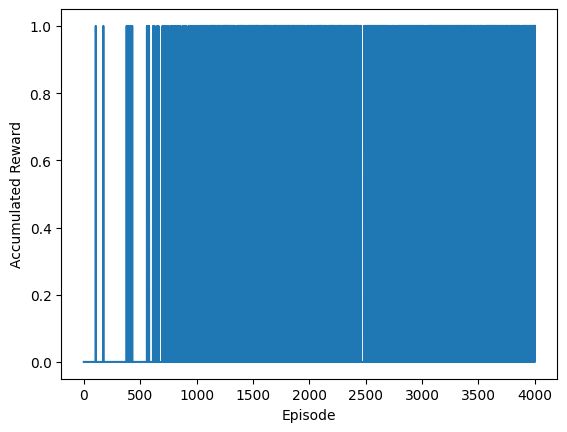

In [6]:
agent = TabularQAgent(
    state_space=16,  # Assuming a 4x4 map for simplicity
    action_space=4,        # Number of actions in FrozenLake
    lr=0.8, 
    gamma=0.9, 
    epsilon=0.99, 
    epsilon_decay=0.0001, 
    epsilon_minimum=0.01
)

train_agent(agent, map_name="4x4", is_slippery=True, episodes=4000)

In [7]:
test_agent(agent, map_name="4x4", is_slippery=True, episodes=5)

: 